## Representación de datos y ingeniería de características


Hasta ahora, hemos supuesto que nuestros datos se presentan como una matriz bidimensional de números de punto flotante, donde cada columna es una característica continua que describe los puntos de datos. Para muchas aplicaciones, esta no es la forma en que se recopilan los datos. Un tipo de característica particularmente común son las características categóricas. También conocidas como características discretas, generalmente no son numéricas.

La distinción entre características categóricas y continuas es análoga a la distinción entre clasificación y regresión, solo en el lado de entrada más que en el de salida. Ejemplos de características continuas que hemos visto son el brillo de píxeles y medidas de tamaño de flores de plantas. Ejemplos de características categóricas son la marca de un producto, el color de un producto o el departamento (libros, ropa, hardware) en que se vende.

Independientemente de los tipos de características en las que se basan sus datos, la forma en que las represente puede tener un efecto enorme en el rendimiento de los modelos del machine learning.

La cuestión de cómo representar mejor sus datos para una aplicación en particular se conoce como `ingeniería de características` y es una de las principales tareas de los científicos de datos y los profesionales del machine learning  que intentan resolver problemas del mundo real. Representar sus datos de la manera correcta puede tener una mayor influencia en el rendimiento de un modelo supervisado que los parámetros exactos que se elija.

### Variables categóricas

Como ejemplo, utilizaremos el conjunto de datos de ingresos de adultos en los Estados Unidos, derivado de la base de datos del censo de 1994. La tarea del conjunto de datos para adultos es predecir si un trabajador tiene un ingreso de más de $ 50,000 o menos de $ 50,000. Las características en este conjunto de datos incluyen las edades de los trabajadores, situación laboral (autónomos, empleados de la industria privada, empleados del gobierno, etc.), su educación, su género, sus horas de trabajo por semana, ocupación y más.


![](Grafico4.png)


La tarea se expresa como una tarea de clasificación con las dos clases con ingresos `<= 50k` y `>50k`. También sería posible predecir el ingreso exacto  y hacer de esto una tarea de regresión. Sin embargo, eso sería mucho más difícil, y la división `50K` es interesante de entender por sí misma.

En este conjunto de datos, `age` y `hours-per-week` son características continuas, que sabemos cómo tratar. Sin embargo, las características `workclass`, `education`, `sex` y `occupation` son categóricas. Todos estas varables provienen de una lista fija de valores posibles, a diferencia de un rango y denotan una propiedad cualitativa, a diferencia de una cantidad.

### One-Hot-Encoding (variables dummy)

La forma más común de representar variables categóricas es usando la `one-hot-encoding` o `one-out-of-N encoding`, también conocida como `variables dummy`. La idea detrás de las variables dummy es reemplazar una variable categórica con una o más características nuevas que pueden tener los valores 0 y 1. Los valores 0 y 1 tienen sentido en la fórmula de clasificación binaria lineal (y para todos los demás modelos en scikit-learn )  y podemos representar cualquier cantidad de categorías introduciendo una nueva característica por categoría, como se describe aquí.

Si para la característica `workclass`, tenemos los posibles valores de `Governmen Employee`, `Private Employee`, `Self Employed` y `Self Employed Incorporated`. Para codificar estos cuatros posibles valores, creamos cuatro nuevas características llamadas `Government Employee` `Private Employee`, `Self Employed` y  `Self Employed Incorporated`.

Una característica es 1 si `workclass` para esta persona tiene el valor correspondiente y `0` en caso contrario, por lo que exactamente una de las cuatro características nuevas será 1 para cada punto de datos. Esta es la razón por la cual esto se llama codificación `one-hot` o `one-out-of-N`.

Una sola característica está codificada usando cuatro nuevas características. Cuando utilicemos estos datos en un algoritmo de machine learning, descartaríamos la función de clase `workclass` original y solo mantendríamos las características 0-1.

![](Grafico5.png)

La codificación `one-hot`que usamos es bastante similar, pero no idéntica, a la codificación `dummy` utilizada en las estadística. Para simplificar, codificamos cada categoría con una característica binaria diferente. En la estadística, es común codificar una característica categórica con k diferentes valores posibles en k-1 característica (la última se representa como todos  ceros). Esto se hace para simplificar el análisis (más técnicamente, esto evitará que la matriz de datos tenga una clasificación deficiente).

Hay dos formas de convertir sus datos a una codificación `one-hot` de variables categóricas, utilizando `pandas` o `scikit-learn`. Usandos pandas es un poco más fácil, así que sigamos esta ruta. Primero cargamos los datos usando pandas desde un archivo de valores separados por comas (CSV):

In [2]:
import pandas as pd
datos = pd.read_csv("adult.data", header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])
# Seleccionamos algunas columnas
datos = datos[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]
display(datos.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### Comprobación de datos categóricos codificados por cadenas

Después de leer un conjunto de datos como este, a menudo es bueno verificar primero si una columna contiene realmente datos categóricos significativos. Al trabajar con datos que fueron ingresados por humanos (por ejemplo, los usuarios en un sitio web), es posible que no haya un conjunto fijo de categorías, y las diferencias en la ortografía y el uso de mayúsculas pueden requerir preprocesamiento.

Por ejemplo, podría ser que algunas personas especificaran el género como `male `y algunas como `man`  y es posible que deseemos representar estas dos entradas usando la misma categoría. 

Una buena forma de verificar el contenido de una columna es usando la función `value_counts` de una serie de pandas, para mostrarnos cuáles son los valores únicos y con qué frecuencia aparecen:

In [3]:
print(datos.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


Hay una manera muy simple de codificar los datos en pandas, usando la función `get_dummies`. La función `get_dummies` transforma automáticamente todas las columnas que tienen tipo de objeto (como cadenas) o son categóricas (que es un concepto especial de pandas del que todavía no hemos hablado):

In [4]:
print("Caracteristicas originales:\n", list(datos.columns), "\n")
datos_dummies = pd.get_dummies(datos)
print("Caracteristicas despues de  get_dummies:\n", list(datos_dummies.columns))

Caracteristicas originales:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Caracteristicas despues de  get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'oc

In [5]:
datos_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Ahora podemos usar el atributo `values` para convertir el data frame `datos_dummies` en una matriz NumPy y luego entrenarlo en un modelo de machine learning. Se debe tener cuidado de separar la variable objetivo (que ahora está codificada en dos columnas `income`) de los datos antes de entrenar un modelo. Incluir la variable de salida, o alguna propiedad derivada de la variable de salida, en la representación de características es un error muy común en la creación de modelos supervisados de machine learning.

Tener cuidado: la indexación de columna en pandas incluye el final del rango, por lo que `age: occupation_Transport-moving` incluye `occupation_Transport-moving `. Esto es diferente a un slicing de una matriz NumPy, donde el final de un rango no está incluido: por ejemplo, `np.arange(11)[0:10]` no incluye la entrada con el índice 10.

In [6]:
caracteristica = datos_dummies.ix[:,'age':'occupation_ Transport-moving']
# Extraemos matrices NumPy
X = caracteristica.values
y = datos_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


/home/c-laraavila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Ahora los datos están representados de una manera que scikit-learn puede funcionar,  podemos proceder como de costumbre:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion de pruebas: {:.2f}".format(logreg.score(X_prueba, y_prueba)))

Puntuacion de pruebas: 0.81


En este ejemplo, llamamos a `get_dummies` en un DataFrame que contiene tanto los datos de  entrenamiento como los datos de prueba. Esto es importante para garantizar que los valores categóricos estén representados de la misma manera en el conjunto de entrenamiento y en el conjunto de prueba.

Imaginemos que tenemos los conjuntos de entrenamiento y prueba en dos data frame de datos diferentes. Si el valor de `Private Employee`, para la característica `workclass` no aparece en el conjunto de prueba, pandas asumirá que solo hay tres valores posibles para esta característica y crearán solo tres nuevas características dummy.

Ahora nuestros conjuntos de entrenamiento y prueba tienen diferentes números de características y ya no podemos aplicar el modelo que aprendimos en el conjunto de entrenamiento al conjunto de pruebas.

Peor aún, imagine que la característica `workclass` tiene los valores `Government Employee` y `Private Employee` en el conjunto de entrenamiento y `Self Employed` y `Self Employed Incorporated` en el conjunto de prueba. En ambos casos, pandas creará dos nuevas característica dummy, por lo que los data frame codificados tendrán la misma cantidad de características.

Sin embargo, las dos características dummies tienen significados completamente diferentes en los conjuntos de entrenamiento y prueba. La columna que significa `Government Employee` para el conjunto de entrenamiento codificará  `Self Employed` para el conjunto de prueba.


Si construimos un modelo de machine learning  con estos datos, funcionaría muy mal, porque supondría que las columnas significan las mismas cosas (porque están en la misma posición) cuando en realidad significan cosas muy diferentes. Para solucionar esto, llamamos a `get_dummies` en un DataFrame que contenga tanto los puntos de datos de  entrenamiento y  prueba, o asegúrese de que los nombres de columna sean los mismos para el conjunto de entrenamiento y prueba después de llamar a `get_dummies`, para garantizar que tengan la misma semántica.


### Los números pueden codificarse categóricos

En el ejemplo del conjunto de datos para adultos, las variables categóricas se codificaron como cadenas. Por un lado, eso abre la posibilidad de errores ortográficos, pero por otro lado, marca claramente una variable como categórica. A menudo, ya sea para facilitar el almacenamiento o por la forma en que se recopilan los datos, las variables categóricas se codifican como enteros.

Por ejemplo, imagine que los datos del censo en el conjunto de datos `adult` se recopilaron mediante un cuestionario y las respuestas para `workclass` se registraron como 0 (primera casilla marcada), 1 (segunda casilla marcada), 2 (tercera casilla marcada) y así sucesivamente.

Ahora la columna contendrá números del 0 al 8, en lugar de cadenas como `Private`, y no será inmediatamente obvio para alguien que observa la tabla que representa el conjunto de datos si deben tratar esta variable como continua o categórica. Sin embargo, sabiendo que los números indican el estado de empleo, es claro que estos son estados muy distintos y no deben ser modelados por una sola variable continua.

Las características categóricas a menudo se codifican con números enteros. El hecho de que sean números no significa que deban tratarse necesariamente como características continuas. No siempre está claro si una característica entera debe tratarse como continua o discreta (y codificada  one-hot). Si no hay orden entre las semánticas que están codificadas (como en el ejemplo de `workclass`), la característica se debe tratar como discreta. En otros casos, como clasificaciones de cinco estrellas, la mejor codificación depende de la tarea y los datos en particular y qué algoritmo de machine  learning se utiliza.

La función `get_dummies` en pandas trata todos los números como continuos y no creará variables dummies para ellos. Para evitar esto, puede usar el `OneHotEncoder` de scikitlearn, para lo cual puede especificar qué variables son continuas y discretas, o convertir columnas numéricas en el DataFrame en cadenas. Para ilustrar, creamos un objeto DataFrame con dos columnas, una que contenga cadenas y otra que contenga números enteros:


In [8]:
# creamos un DataFrame con una característica entera y una característica de cadena categórica

demo_df = pd.DataFrame({'Caracteristica entera': [0, 1, 2, 1],
                        'Caracteristica categorica': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Caracteristica categorica,Caracteristica entera
0,socks,0
1,fox,1
2,socks,2
3,box,1


El uso de `get_dummies` solo codificará las característica de cadena y no cambiará la característica de entero, como puede ver:

In [9]:
pd.get_dummies(demo_df)

,Caracteristica entera,Caracteristica categorica_box,Caracteristica categorica_fox,Caracteristica categorica_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Si desea que se creen variables dummy para la columna `Caracteristica entera`, puede listar explícitamente las columnas que desea codificar utilizando el parámetro de `columns`. Entonces, ambas características serán tratadas como categóricas:

In [10]:
demo_df['Caracteristica entera'] = demo_df['Caracteristica entera'].astype(str)
pd.get_dummies(demo_df, columns=['Caracteristica entera', 'Caracteristica categorica'])

,Caracteristica entera_0,Caracteristica entera_1,Caracteristica entera_2,Caracteristica categorica_box,Caracteristica categorica_fox,Caracteristica categorica_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Binning, discretización, modelos lineales y árboles

La mejor forma de representar los datos depende no solo de la semántica de los datos, sino también del tipo de modelo que está utilizando. Los modelos lineales y los modelos basados en árboles (como árboles de decisión, árboles con gradient boosted y bosques aleatorios), dos familias grandes y muy utilizadas, tienen propiedades muy diferentes cuando se trata de cómo funcionan con diferentes representaciones de características. Regresemos al conjunto de datos de regresión `wave`.  Tiene solo una función de entrada. Aquí hay una comparación de un modelo de regresión lineal y un regresor de árbol de decisión en este conjunto de datos:


In [11]:
%matplotlib inline
import numpy as np
def hacer_wave(n_muestras=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_muestras)
    y_no_ruido = (np.sin(4 * x) + x)
    y = (y_no_ruido + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

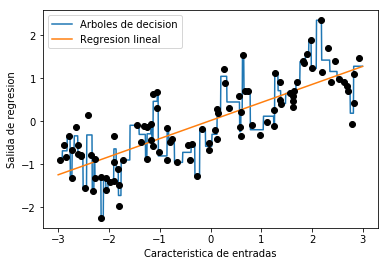

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = hacer_wave(n_muestras=100)
linea = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(linea, reg.predict(linea), label="Arboles de decision")
reg = LinearRegression().fit(X, y)
plt.plot(linea, reg.predict(linea), label="Regresion lineal")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Salida de regresion")
plt.xlabel("Caracteristica de entradas")
plt.legend(loc="best")

Imaginamos una partición del rango de entrada para la característica (en este caso, los números de -3 a 3) en un número fijo de `bins` contenedores, por ejemplo, 10. Un punto de datos se representará por el contenedor que pertenece. Para determinar esto, primero tenemos que definir los  bins. En este caso, definiremos 10 intervalos igualmente espaciados entre -3 y 3. Utilizamos la función `np.linspace` para esto, creando 11 entradas, que crearán 10 bins: son los espacios entre dos límites consecutivos:

In [13]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


A continuación, registramos para cada punto de datos a que bin pertenece. Esto se puede calcular fácilmente usando la función `np.digitize`:

In [14]:
bin_pertenece = np.digitize(X, bins=bins)
print("\nPuntos de datos:\n", X[:5])
print("\nBin que pertenece los puntos de datos:\n", bin_pertenece[:5])


Puntos de datos:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin que pertenece los puntos de datos:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


Lo que hicimos aquí es transformar la única característica de entrada continua en el conjunto de datos `wave` en una característica categórica que codifica en qué bin está un punto de dato. Para usar un modelo scikitlearn en estos datos, transformamos esta característica discreta a una codificación `one-hot`, usando el OneHotEncoder del módulo `preprocessing`. OneHotEncoder tiene la misma codificación que `pandas.get_dummies`, aunque actualmente solo funciona en variables categóricas que son enteras:

In [15]:
from sklearn.preprocessing import OneHotEncoder
# transformamos usando OneHotEncode
encoder = OneHotEncoder(sparse=False)
# encoder.fit encuentra los valores unicos que aparecen en bin_pertenece
encoder.fit(bin_pertenece)
# transform crea la codificacion one-hot
X_binned = encoder.transform(bin_pertenece)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Debido a que especificamos 10 bins, el conjunto de datos transformados `X_binned` ahora se compone de 10 características:

In [16]:
print("Dimension de  X_binned: {}".format(X_binned.shape))

Dimension de  X_binned: (100, 10)


Ahora construimos un nuevo modelo de regresión lineal y un nuevo modelo de árbol de decisión en los datos codificados con `one-hot`. El resultado se visualiza en la siguiente figura, junto con los límites del contenedor.

Text(0.5,0,'Caracteristica de entrada')

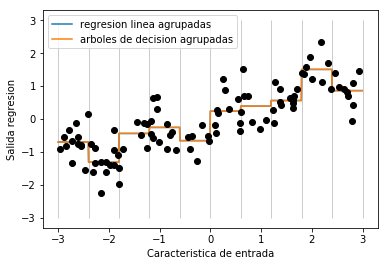

In [20]:
linea_binned = encoder.transform(np.digitize(linea, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(linea, reg.predict(linea_binned), label='regresion linea agrupadas')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(linea, reg.predict(linea_binned), label='arboles de decision agrupadas')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Salida de regresion")
plt.xlabel("Caracteristica de entrada")

La línea punteada y la línea continua están exactamente una encima de la otra, lo que significa que el modelo de regresión lineal y el árbol de decisión hacen exactamente las mismas predicciones.

Para cada contenedor, los modelos  predicen un valor constante. Como las características son constantes dentro de cada contenedor, cualquier modelo debe predecir el mismo valor para todos los puntos dentro de un contenedor. Al comparar lo que los modelos aprendieron antes de agrupar las características y después, el modelo lineal se volvió mucho más flexible, porque ahora tiene un valor diferente para cada contenedor, mientras que el modelo de árbol de decisiones se volvió mucho menos flexible.

Las características utilizando bins generalmente no tienen ningún efecto beneficioso para los modelos basados en árboles, ya que estos modelos pueden aprender a dividir los datos en cualquier lugar. En cierto sentido, eso significa que los árboles de decisión pueden aprender cualquier agrupamiento que sea más útil para predecir en estos datos. 

Además, los árboles de decisión miran múltiples características a la vez, mientras que el binning generalmente se realiza por característica. Sin embargo, el modelo lineal se benefició enormemente  de la transformación de los datos.


### Interacciones y polinomios

Otra forma de enriquecer una representación de características, particularmente para modelos lineales, es agregar características de interacción y características polinómicas de los datos originales. Este tipo de ingeniería de características se usa a menudo en el modelado estadístico, pero también es común en muchas aplicaciones prácticas del machine learning.

Como primer ejemplo, miramos la figura anterior. El modelo lineal aprendió un valor constante para cada contenedor en el conjunto de datos `wave`. Sin embargo, sabemos que los modelos lineales pueden aprender no solo de desplazamientos, sino también de pendientes. Una forma de agregar una pendiente al modelo lineal en los datos agrupados es volver a agregar la característica original (el eje x en el gráfico). Esto lleva a un conjunto de datos de 11 dimensiones, como se ve en la  siguiente figura:

In [19]:
X_combinado= np.hstack([X, X_binned])
print(X_combinado.shape)

(100, 11)


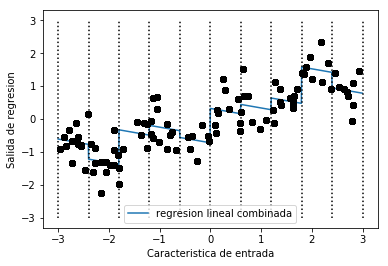

In [33]:
reg = LinearRegression().fit(X_combinado, y)
linea_combinada = np.hstack([linea, linea_binned])
plt.plot(linea, reg.predict(linea_combinada), label='regresion lineal combinada')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc="best")
    plt.ylabel("Salida de regresion")
    plt.xlabel("Caracteristica de entrada")
    plt.plot(X[:, 0], y, 'o', c='k')

En este ejemplo, el modelo aprendió un desplazamiento para cada contenedor, junto con una pendiente. La pendiente aprendida es descendente y se comparte entre todos los bins; existe una única característica de eje x, que tiene una sola pendiente.

Debido a que la pendiente se comparte entre todos los contenedores, no parece ser muy útil. ¡Preferimos tener una pendiente separada para cada contenedor!. Podemos lograr esto agregando una característica de interacción o producto que indique en qué contenedor se encuentra un punto de datos y dónde se encuentra en el eje x. 

Esta característica es un producto del indicador de contenedor y la función original. Vamos a crear este conjunto de datos:

In [23]:
X_producto = np.hstack([X_binned, X * X_binned])
print(X_producto.shape)

(100, 20)


El conjunto de datos ahora tiene 20 características: los indicadores del bin donde se encuentra el punto de datos, y un producto de la característica original y el indicador del contenedor. Se puede pensar en la característica del producto como una copia separada de la función del eje x para cada contenedor. 

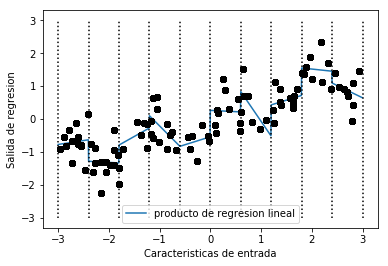

In [25]:
reg = LinearRegression().fit(X_producto, y)
linea_producto = np.hstack([linea_binned, linea * linea_binned])
plt.plot(linea, reg.predict(linea_producto), label='producto de regresion lineal')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.plot(X[:, 0], y, 'o', c='k')
    
    plt.ylabel("Salida de regresion")
    plt.xlabel("Caracteristicas de entrada")
    plt.legend(loc="best")

Como puede ver, ahora cada contenedor tiene su propio desplazamiento y pendiente en este modelo.

El uso de binning es una forma de expandir una característica continua. Otra es usar polinomios de las características originales. Para una característica dada `x`, podríamos considerar `x ** 2`, `x ** 3`, `x ** 4` y así sucesivamente. Esto se implementa en `PolynomialFeatures` en el módulo de `preprocessing`:

In [41]:
from sklearn.preprocessing import PolynomialFeatures
# incluimos polinomios hasta x ** 10:
# "include_bias=True" agrega una caracteristica que es constante a 1
polinomio = PolynomialFeatures(degree=10, include_bias=False)
polinomio.fit(X)
X_polinomio = polinomio.transform(X)

El uso de un grado de 10 produce 10 características:

In [42]:
print("Dimension de X_polinomio: {}".format(X_polinomio.shape))

Dimension de X_polinomio: (100, 10)


Comparemos las entradas de `X_poly` con las de `X`:

In [44]:
print("Entradas de  X:\n{}".format(X[:5]))
print("Entradas de  X_polinomio:\n{}".format(X_polinomio[:5]))

Entradas de  X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entradas de  X_polinomio:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


Se puede obtener la semántica de las características llamando al método `get_feature_names`, que proporciona el exponente para cada característica:

In [45]:
print("Nombres de características polinomiales:\n{}".format(polinomio.get_feature_names()))

Nombres de características polinomiales:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


El uso de características polinómicas junto con un modelo de regresión lineal produce el modelo clásico de regresión polinómica:

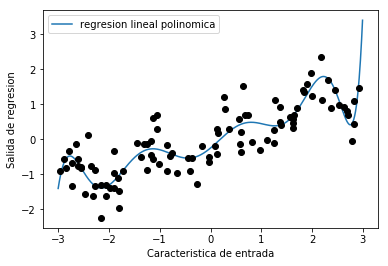

In [46]:
reg = LinearRegression().fit(X_polinomio, y)
linea_polinomio = polinomio.transform(linea)

plt.plot(linea, reg.predict(linea_polinomio), label='regresion lineal polinomica')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Salida de regresion")
plt.xlabel("Caracteristica de entrada")
plt.legend(loc="best")

Como se puede ver, las características polinomiales producen un ajuste muy suave en esta información unidimensional. Sin embargo, los polinomios de alto grado tienden a comportarse de manera extrema en los límites o en regiones con pocos datos.

A modo de comparación, aquí se aprende un modelo de SVM con un kernel RBF en los datos originales, sin ninguna transformación:

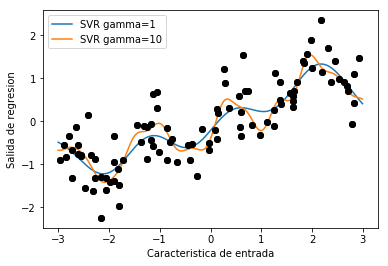

In [47]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(linea, svr.predict(linea), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel("Salida de regresion")
    plt.xlabel("Caracteristica de entrada")
    plt.legend(loc="best")

Usando un modelo más complejo como SVM, podemos aprender una predicción similarmente compleja de la regresión polinomial sin una transformación explícita de las características.

#### Ejemplo

Como una aplicación más realista de interacciones y polinomios, echemos un vistazo al conjunto de datos de Boston Housing. Echemos un vistazo a cómo se construye estas características y a cuánto ayudan las características polinomiales. Primero cargamos los datos y lo cambiamos de escala para que esté entre 0 y 1 usando `MinMaxScaler`:


In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(boston.data, boston.target, random_state=0)

# reescalamos los datos
escalador = MinMaxScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

Ahora, extraemos características e interacciones polinomiales hasta un grado de 2:

In [51]:
polinomio = PolynomialFeatures(degree=2).fit(X_entrenamiento_escalado)
X_entrenamiento_polinomio = poly.transform(X_entrenamiento_escalado)
X_prueba_polinomio = polinomio.transform(X_prueba_escalado)
print("Dimension X_entrenamiento: {}".format(X_entrenamiento.shape))
print("Dimension X_entrenamiento_polinomio: {}".format(X_entrenamiento_polinomio.shape))

Dimension X_entrenamiento: (379, 13)
Dimension X_entrenamiento_polinomio: (379, 105)


La información originalmente tenía 13 características, que se expandieron a 105 características de interacción. Estas nuevas características representan todas las interacciones posibles entre dos características originales diferentes, así como el cuadrado de cada característica original.

`grade = 2` aquí significa que observamos todas las características que son producto de hasta dos características originales.


La correspondencia exacta entre las características de entrada y salida se puede encontrar utilizando el método `get_feature_names`:

In [52]:
print("Nombres de caracteristicas polinomiales:\n{}".format(polinomio.get_feature_names()))

Nombres de caracteristicas polinomiales:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


La primera característica nueva es una característica constante, llamada "1" aquí. Las siguientes 13 características son las características originales (llamadas "x0" a "x12"). Luego sigue la primera característica al cuadrado
("x0 ^ 2") y combinaciones de la primera y las otras características.

Comparemos el rendimiento usando Ridge en los datos con y sin interacciones:

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_entrenamiento_escalado, y_entrenamiento)
print("Puntuaciones sin interacciones: {:.3f}".format(ridge.score(X_prueba_escalado, y_prueba)))
ridge = Ridge().fit(X_entrenamiento_polinomio, y_entrenamiento)
print("Puntuaciones con interacciones: {:.3f}".format(ridge.score(X_prueba_polinomio, y_prueba)))

Puntuaciones sin interacciones: 0.621
Puntuaciones con interacciones: 0.753


Claramente, las interacciones y las características polinomiales nos dieron un buen impulso en el rendimiento al usar Ridge. Al usar un modelo más complejo como un bosque aleatorio, la historia es un poco diferente, sin embargo:

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_entrenamiento_escalado, y_entrenamiento)
print("Puntuaciones sin interacciones: {:.3f}".format( rf.score(X_prueba_escalado, y_prueba)))
rf = RandomForestRegressor(n_estimators=100).fit(X_entrenamiento_polinomio, y_entrenamiento)
print("Puntuaciones interacciones: {:.3f}".format(rf.score(X_prueba_polinomio, y_prueba)))

Puntuaciones sin interacciones: 0.797
Puntuaciones interacciones: 0.763


Se puede ver que incluso sin características adicionales, el bosque aleatorio supera el rendimiento de Ridge. Agregar interacciones y polinomios en realidad disminuye un poco el rendimiento.

### Transformaciones no lineales univariadas

Acabamos de ver que agregar características cuadradas o en cubos puede ayudar a los modelos lineales para la regresión. Hay otras transformaciones que a menudo resultan útiles para transformar ciertas características: en particular, al aplicar funciones matemáticas como `log`, `exp` o `sin`.

Mientras que los modelos basados en árboles solo se preocupan por el orden de las características, los modelos lineales y las redes neuronales están muy vinculados a la escala y distribución de cada característica, y si existe una relación no lineal entre la característica y el objetivo, esto se vuelve difícil de modelar -particularmente en regresión.

Las funciones `log` y `exp` pueden ayudar ajustando las escalas relativas en los datos para que puedan ser capturados mejor por un modelo lineal o red neuronal. Las funciones `sin` y `cos` pueden ser útiles cuando se trata de datos que codifican patrones periódicos.

La mayoría de los modelos funcionan mejor cuando cada característica (y en regresión, también el objetivo) está distribuida de forma gaussiana, es decir, un histograma de cada característica debe tener algo parecido a la forma familiar de "curva de campana".

El uso de transformaciones como log y exp es una forma ingeniosa pero simple y eficiente de lograr esto. Un caso particularmente común cuando tal transformación puede ser útil es cuando se trata de datos de recuento de enteros. Según los datos de conteo, nos referimos a características como "¿con qué frecuencia el usuario A ingresa?" Las cuentas nunca son negativas, y a menudo siguen patrones estadísticos particulares.

#### Ejemplo

Estamos utilizando un conjunto de datos artificiales de recuentos que tiene propiedades similares a las que puede encontrar en la naturaleza. Las características son todas de valor entero, mientras que la respuesta es continua:


In [66]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Veamos las primeras 10 entradas de la primera característica. Todos son valores enteros y positivos, pero aparte de eso, es difícil distinguir un patrón en particular. Si contamos la apariencia de cada valor, la distribución de los valores se vuelve más clara:

In [67]:
print("Numero de apariciones de caracteristica:\n{}".format(np.bincount(X[:, 0])))

Numero de apariciones de caracteristica:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


El valor 2 parece ser el más común, con 62 apariciones (el `bincount` siempre comienza en 0), y los recuentos de valores más altos caen rápidamente. Sin embargo, hay algunos valores muy altos, como 134 que aparecen dos veces. Visualizamos los recuentos en la siguiente figura:

Text(0.5,0,'Valores')

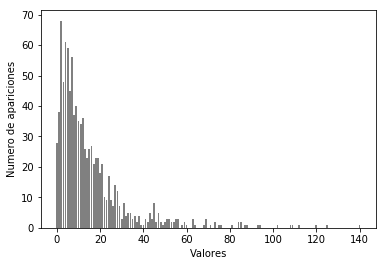

In [69]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Numero de apariciones")
plt.xlabel("Valores")

Las características `X[:, 1]` y `X[:, 2]` tienen propiedades similares. Este tipo de distribución de valores (muchos pequeños y algunos muy grandes) es muy común en la práctica.
Sin embargo, es algo que la mayoría de los modelos lineales no pueden manejar muy bien. Tratemos de ajustar una regresión ridge a este modelo:

In [70]:
from sklearn.linear_model import Ridge
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)
puntuacion = Ridge().fit(X_entrenamiento, y_entrenamiento).score(X_prueba, y_prueba)
print("Puntuacion del conjunto de  prueba: {:.3f}".format(puntuacion))

Puntuacion del conjunto de  prueba: 0.622


Como se puede ver en el puntaje $R^2$ relativamente bajo, Ridge no fue capaz de capturar realmente la relación entre `X` e `y`. Sin embargo, aplicar una transformación logarítmica puede ayudar. Como el valor `0` aparece en los datos (y el logaritmo no está definido en `0`), no podemos simplemente aplicar log, pero tenemos que calcular el `log(X + 1)`:

In [71]:
X_entrenamiento_log = np.log(X_entrenamiento + 1)
X_prueba_log = np.log(X_prueba + 1)

Después de la transformación, la distribución de los datos es menos asimétrica y ya no tiene valores atípicos muy grandes.

Text(0.5,0,'Valores')

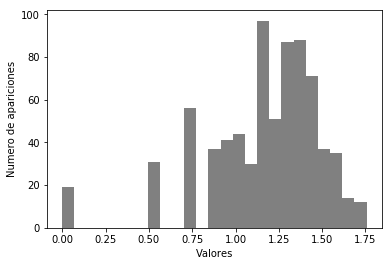

In [74]:
plt.hist(np.log(X_entrenamiento_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Numero de apariciones")
plt.xlabel("Valores")

Construir un modelo ridge sobre los nuevos datos proporciona un ajuste mucho mejor:

In [76]:
puntuacion = Ridge().fit(X_entrenamiento_log, y_entrenamiento).score(X_prueba_log, y_prueba)
print("Puntuacion del conjunto de prueba: {:.3f}".format(puntuacion))

Puntuacion del conjunto de prueba: 0.875


Encontrar la transformación que mejor funciona para cada combinación de conjunto de datos y modelo es algo así como un arte. En este ejemplo, todas las características tienen las mismas propiedades. Esto rara vez es el caso en la práctica, y generalmente solo se debe transformar un subconjunto de las características, o a veces cada característica necesita transformarse de una manera diferente.

Como mencionamos anteriormente, este tipo de transformaciones son irrelevantes para los modelos basados en árboles, pero podrían ser esenciales para los modelos lineales. A veces también es una buena idea transformar la variable objetivo `y` en regresión. 

Intentar predecir recuentos (por ejemplo, número de órdenes) es una tarea bastante común, y usar la transformación  `log (y + 1)` a menudo ayuda. Esta es una aproximación de usar la regresión de Poisson, que sería la solución adecuada desde un punto de vista probabilístico.